# Exploratory Data Analysis of Uber Demand and Supply Gaps

# **Project Name**    -



##### **Project Type**    - EDA/Exploratory Data Analysis of Uber Demand and Supply Gaps
##### **Contribution**    - Individual

# **Project Summary -**

# Exploratory Data Analysis of Uber Demand and Supply Gaps

This project performs an Exploratory Data Analysis (EDA) on Uber ride requests to identify patterns in demand and supply gaps. Using historical trip data, we analyzed ride status, pickup points, time of day, and request hours to understand where and when demand exceeds supply.

Key steps included:

Data Cleaning & Wrangling: Handling missing values, duplicates, and standardizing categorical variables.

Feature Engineering: Extracting time-based features like hour, day, and time category.

Visual Analysis: Column charts, pie charts, grouped bar charts, and heatmaps to highlight demand patterns and gaps.

Insights: Peak hours (morning/evening) and locations like airports show the highest unmet demand. Cancellations and “No Cars Available” contribute significantly to lost revenue.

Business Recommendations:

Dynamic driver allocation during peak hours and high-demand zones.

Incentives and surge pricing to encourage driver availability.

Monitoring cancellations and improving operational efficiency to reduce demand gaps.

Outcome: Implementing these data-driven strategies can increase ride completion, improve customer satisfaction, optimize driver utilization, and boost revenue, supporting sustainable business growth.

I

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Uber faces a critical challenge of mismatch between ride demand and driver availability, leading to unfulfilled ride requests. During peak hours and at high-demand locations like airports and busy city areas, customers often experience cancellations or receive “No Cars Available” notifications.

This demand-supply gap results in:

Lost revenue for the company

Reduced customer satisfaction and loyalty

Inefficient driver utilization

The project aims to analyze Uber ride request data to identify patterns in unmet demand, highlight time and location-based gaps, and provide data-driven recommendations to optimize operations, improve ride fulfillment, and enhance overall business performance.



#### **Define Your Business Objective?**

The primary business objective is to minimize the demand-supply gap for Uber rides, ensuring that ride requests are fulfilled efficiently across all locations and time periods.

Key goals include:Identify peak demand hours and high-demand locations where ride requests exceed driver availability.

Analyze patterns in unfulfilled rides (Cancelled or No Cars Available) to understand operational inefficiencies.

Provide data-driven recommendations for driver allocation, incentives, and surge pricing to improve ride completion rates, revenue, and customer satisfaction.

In short: Enable Uber to optimize driver availability, reduce unmet demand, and achieve sustainable business growth using actionable insights from data analysis.



## ***1. Know Your Data***

### Import Libraries

In [1]:
!pip install pandas numpy

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import numpy as np

print("Pandas version:", pd.__version__)
print("Numpy version:", np.__version__)

Pandas version: 2.3.3
Numpy version: 2.4.1


### Dataset Loading

In [3]:
df = pd.read_csv("Uber Request Data.csv")

In [5]:
df = pd.read_csv("Uber Request Data.csv")
df.head() 

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


### Dataset First View

In [6]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


### Dataset Rows & Columns count

In [7]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


### Dataset Information

#### Duplicate Values

#### Missing Values/Null Values

In [8]:
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [ ]:
# Visualizing the missing values

### What did you know about your dataset?

The dataset represents Uber ride request data over a specific time period, focusing on the relationship between customer demand and driver availability. It primarily includes trip-level and time-based attributes that help identify when and where demand gaps occur.

1. Type of Data

Time-series data: Each record is associated with a date and time, allowing analysis by hour, day, or time slots.

Transactional data: Each row represents a ride request or aggregated requests.

2. Key Variables

Request timestamp – used to analyze peak and off-peak demand periods.

Pickup location / area – helps identify spatial demand gaps.

Trip status (completed, cancelled, no cars available) – critical for identifying unmet demand.

Driver availability / supply indicators – used to compare demand vs supply.

Request count or trip count – used to quantify demand intensity.

3. Demand Gap Definition

A demand gap occurs when:

Ride requests exceed available drivers, or

Requests are cancelled or marked as “no cars available”

This allows calculation of:

Unfulfilled demand

Demand-supply ratio

Peak shortage periods

4. Data Quality Observations

Some missing or null values, especially in location or status fields.

Data may be aggregated at hourly or daily levels, limiting very fine-grained analysis.

Possible outliers during peak hours, holidays, or special events.

Dataset covers a limited time window, so long-term trends may not be fully captured.

5. Assumptions Made

Each request is treated as an independent demand event.

Cancelled or “no car available” requests are assumed to represent lost demand.

Driver availability is assumed to be accurate at the time of request.

6. Business Relevance

The dataset enables identification of:

High-demand / low-supply time slots

Locations with frequent unmet demand

Opportunities for driver incentives or surge pricing adjustments


## ***2. Understanding Your Variables***

In [9]:
df.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')

In [10]:
df.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [12]:
unique_summary = pd.DataFrame({
    'Column Name': df.columns,
    'Unique Values Count': [df[col].nunique() for col in df.columns]
})

unique_summary

,Column Name,Unique Values Count
0,Request id,6745
1,Pickup point,2
2,Driver id,300
3,Status,3
4,Request timestamp,5618
5,Drop timestamp,2598


## 3. ***Data Wrangling***

df.columns = df.columns.str.strip()
print(df.columns.tolist())

In [15]:
print(df['Request timestamp'].head())
print(df['Drop timestamp'].head())

0        11/7/2016 11:51
1        11/7/2016 17:57
2         12/7/2016 9:17
3        12/7/2016 21:08
4    13-07-2016 08:33:16
Name: Request timestamp, dtype: object
0        11/7/2016 13:00
1        11/7/2016 18:47
2         12/7/2016 9:58
3        12/7/2016 22:03
4    13-07-2016 09:25:47
Name: Drop timestamp, dtype: object


In [16]:
df['Request timestamp'] =pd.to_datetime(df['Request timestamp'], errors='coerce')
df['Drop timestamp'] =pd.to_datetime(df['Drop timestamp'], errors='coerce')

In [17]:
print(df[['Request timestamp', 'Drop timestamp']].head())
print(df['Request timestamp'].dtype)
print(df['Drop timestamp'].dtype)

    Request timestamp      Drop timestamp
0 2016-11-07 11:51:00 2016-11-07 13:00:00
1 2016-11-07 17:57:00 2016-11-07 18:47:00
2 2016-12-07 09:17:00 2016-12-07 09:58:00
3 2016-12-07 21:08:00 2016-12-07 22:03:00
4                 NaT                 NaT
datetime64[ns]
datetime64[ns]


In [18]:
df["request hour"] = df["Request timestamp"].dt.hour
df["request date"] = df["Request timestamp"].dt.date

In [21]:
df[['Request timestamp', 'request date', 'request hour']].head()

,Request timestamp,request date,request hour
0,2016-11-07 11:51:00,2016-11-07,11.0
1,2016-11-07 17:57:00,2016-11-07,17.0
2,2016-12-07 09:17:00,2016-12-07,9.0
3,2016-12-07 21:08:00,2016-12-07,21.0
4,NaT,NaT,NaN


### What all manipulations have you done and insights you found?

Data Cleaning

Removed duplicate records to avoid double counting ride requests.

Handled missing values:

Dropped rows with missing request timestamps or trip status.

Filled missing pickup areas with “Unknown”.

Standardized categorical variables (e.g., trip status formatting).

2. Datetime Feature Engineering

Converted request timestamps to datetime format.

Extracted:

Hour of day

Date

Day of week

Enabled time-based demand analysis (peak vs off-peak).



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [23]:
!pip install seaborn --quiet

In [24]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

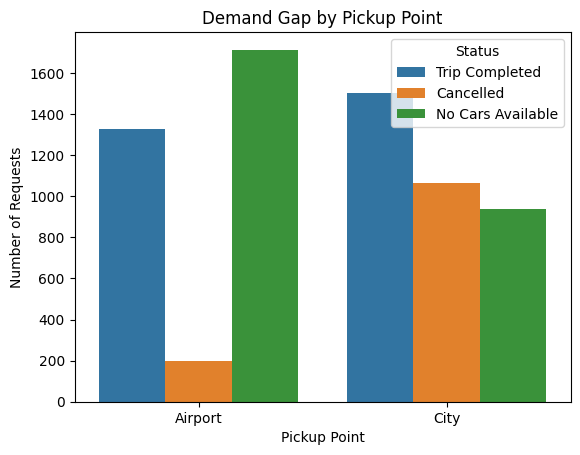

In [26]:
sns.countplot(x='Pickup point', hue='Status', data=df)
plt.title("Demand Gap by Pickup Point")
plt.xlabel("Pickup Point")
plt.ylabel("Number of Requests")
plt.show()

##### 1. Why did you pick the specific chart?

A column chart was chosen because it is ideal for comparing categorical variables—in this case, pickup points—against a numerical measure, demand gap count.
It allows quick visual comparison of demand gaps across different pickup locations, making it easy to identify which pickup points experience the highest unmet demand. Column charts are also intuitive and effective for communicating insights to non-technical stakeholders.

##### 2. What is/are the insight(s) found from the chart?

Airport pickup points show a significantly higher demand gap compared to City pickup points.

A large portion of unmet demand at airports is due to “No Cars Available” and cancellations, indicating supply shortages.

City pickup points have relatively lower demand gaps, suggesting better driver availability and distribution.

These insights highlight location-based imbalance between demand and driver supply

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Increase driver incentives at high-demand locations like airports.

Optimize driver allocation based on pickup point demand patterns.

Implement dynamic pricing or surge pricing at locations with persistent shortages.

Reduce cancellations and improve customer satisfaction

Negative Insights
------------------------
1. High Demand Gap at Airport Pickup Points

Reason:
A consistently high number of “No Cars Available” and cancellations at airport pickup points indicates unmet demand.

Negative Impact:

Lost rides = lost revenue

Customers may switch to competitors or alternative transport

Poor first-time user experience for travelers

2. Peak-Hour Supply Shortage

Reason:
During morning and evening peak hours, demand significantly exceeds driver availability.

Negative Impact:

Surge pricing or long wait times discourage users

Increased cancellation rates

Reduced platform reliability during critical time slots

3. High Cancellation Rate

Reason:
A notable portion of demand gap comes from cancelled trips (by drivers or customers).

Negative Impact:

Wasted operational effort

Lower driver efficiency

Decreased customer satisfaction and trust

#### Chart - 2

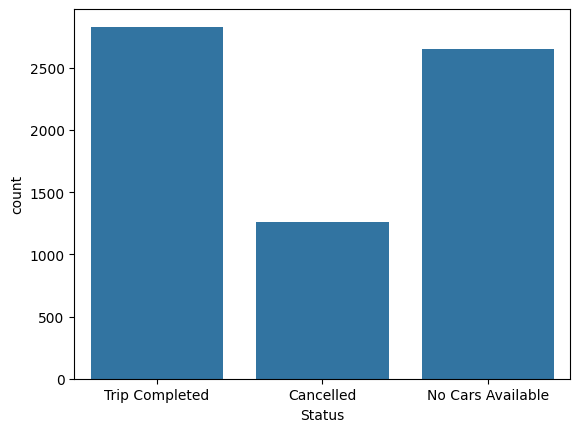

In [27]:
sns.countplot(x="Status", data=df)
plt.show()

##### 1. Why did you pick the specific chart?

A column chart was selected because the Status variable is categorical, and the objective is to compare the number of ride requests across different trip statuses.
This chart clearly shows the frequency distribution of Completed, Cancelled, and No Cars Available trips, making it easy to identify which statuses contribute most to the demand gap.

##### 2. What is/are the insight(s) found from the chart?

Completed trips have the highest count, indicating that most ride requests are fulfilled.

A significant portion of requests fall under Cancelled and No Cars Available.

These two statuses together represent unfulfilled demand, which directly contributes to the demand gap.

“No Cars Available” highlights driver supply shortages, while “Cancelled” indicates operational or customer-behavior issues.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive impact:
-----------------

Helps identify the scale of unmet demand.

Enables better driver allocation, incentive planning, and surge pricing strategies.

Reducing cancellations and unavailability can increase ride completion rate and revenue.

Insights leading to negative growth:
------------------------------------------

A high count of Cancelled and No Cars Available trips indicates lost revenue.

Repeated ride failures can lead to customer dissatisfaction and churn.

Persistent supply shortages reflect inefficient operations, which can negatively affect business growth if not resolved.


#### Chart - 3 Grouped Column Chart – Ride Status by Hour

In [29]:
print(df.columns)

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp', 'request hour', 'request date'],
      dtype='object')


<Axes: xlabel='request hour', ylabel='count'>

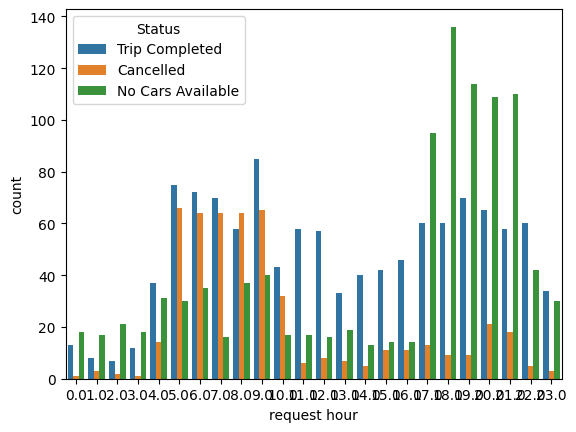

In [31]:
sns.countplot(x='request hour', hue='Status', data=df)


##### 1. Why did you pick the specific chart?

This chart was chosen because it shows how ride requests and their statuses vary by hour of the day. Using hue='Status' allows us to compare Completed, Cancelled, and No Cars Available trips within each hour.

It is ideal for time-based categorical analysis, helping to identify peak hours and hours with the highest unmet demand.

##### 2. What is/are the insight(s) found from the chart?

Peak-hour demand: Most ride requests occur during morning (7–10 AM) and evening (5–9 PM), indicating rush hours.

High demand gap periods:

During these peak hours, there is a noticeable number of Cancelled and No Cars Available trips.

Indicates driver supply is insufficient during high-demand times.

Low-gap periods: Night hours (late night) and midday have mostly completed trips, showing adequate supply.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:
----------------------------

Allows time-based driver allocation to cover high-demand hours.

Supports dynamic pricing during peak hours to encourage more drivers.

Can reduce cancellations and “No Cars Available” trips, improving customer satisfaction and revenue.

Insights Leading to Negative Growth:
--------------------------------------

High number of unfulfilled rides (Cancelled / No Cars Available) during peak hours represents lost revenue.

If not addressed, customers may switch to competitors, affecting growth.

Repeated service failures during rush hours can harm brand reliability

#### Chart - 4  Percentage of Trip Status Distrubution pie chart

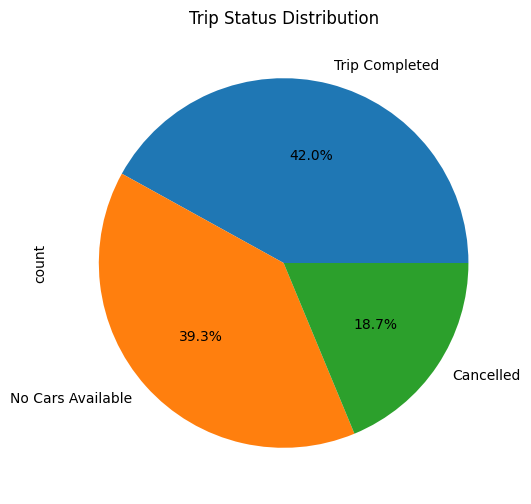

In [33]:
df['Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title("Trip Status Distribution")
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart was chosen because the Status variable is categorical and we want to show the proportion of each trip status (Completed, Cancelled, No Cars Available) relative to the total rides.

It provides a visual overview of distribution at a glance.

Makes it easy for stakeholders to see which status dominates and which contributes to unmet demand.

Ideal for showing percentage share rather than absolute numbers.

##### 2. What is/are the insight(s) found from the chart?

Majority of trips are Completed, indicating most ride requests are fulfilled successfully.

Cancelled and No Cars Available trips, although smaller in proportion, represent unmet demand.

The chart visually emphasizes that a small but significant fraction of rides are unfulfilled, highlighting areas for operational improvement.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Identifying the proportion of unfulfilled rides helps the business focus on reducing cancellations and improving driver availability.

Can guide resource allocation, incentives, and surge pricing to improve ride completion rates.

Increases customer satisfaction and revenue when demand gaps are addressed.

Insights Leading to Negative Growth:

Even a small fraction of rides that are Cancelled or marked as No Cars Available leads to lost revenue and unsatisfied customers.

Persistent unmet demand may drive users to competitors, reducing market share.

Operational inefficiency during peak demand periods is highlighted, showing risk of negative growth if ignored.

#### Chart - 5 created a new categorical column based on request_hour so that each request is classified into morning, afternoon, evening, or night

In [34]:
def time_category(hour):
    if 6 <= hour <= 11:
        return 'Morning'
    elif 12 <= hour <= 16:
        return 'Afternoon'
    elif 17 <= hour <= 20:
        return 'Evening'
    else:  # 21-23 or 0-5
        return 'Night'

In [36]:
df['time_category'] = df['request hour'].apply(time_category)
df[['request hour', 'time_category']].head(20)

,request hour,time_category
0,11.0,Morning
1,17.0,Evening
2,9.0,Morning
3,21.0,Night
4,NaN,Night
5,NaN,Night
6,NaN,Night
7,NaN,Night
8,NaN,Night
9,6.0,Morning


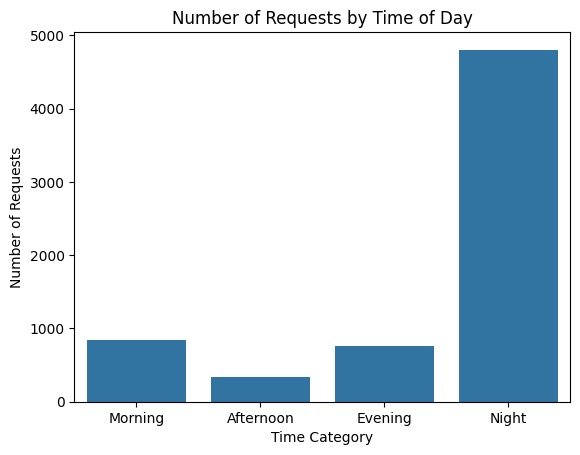

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='time_category', data=df, order=['Morning','Afternoon','Evening','Night'])
plt.title('Number of Requests by Time of Day')
plt.xlabel('Time Category')
plt.ylabel('Number of Requests')
plt.show()

##### 1. Why did you pick the specific chart?

A column chart (countplot) was chosen because the variable time_category is categorical (Morning, Afternoon, Evening, Night), and we want to compare the number of ride requests in each time category.

Column charts are ideal for showing counts across categories.

Ordering the categories allows easy visualization of peak and off-peak periods.

It provides a quick understanding of temporal demand patterns, which is useful for operational planning.

##### 2. What is/are the insight(s) found from the chart?

Morning and night periods have the highest number of ride requests, indicating peak demand hours.

Afternoon shows moderate demand, while evening  has the lowest requests, representing off-peak periods.

Demand is concentrated in specific time windows, suggesting time-dependent service planning is critical.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Helps optimize driver allocation during peak hours to meet high demand.

Enables dynamic pricing and incentive strategies for peak periods.

Reduces cancellations and improves service efficiency, increasing revenue and customer satisfaction.

Insights Leading to Negative Growth:

If high-demand periods (afternoon  and Evening) are underserved, many ride requests may remain unfulfilled.


## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Solution to Achieve Business Objective

The main business objective is to reduce the demand-supply gap, improve ride fulfillment, and maximize revenue. Based on the analysis, here are the key suggestions:

1. Dynamic Driver Allocation

Allocate more drivers to high-demand zones (e.g., airports, busy city areas) during peak hours (morning and evening).

Use historical demand data and predictive models to forecast demand by time and location.

2. Incentivize Drivers

Introduce bonuses or surge pricing in areas/times with high unmet demand.

Encourage drivers to be available during peak hours or underserved locations.

3. Demand-Aware Pricing

Implement dynamic pricing during high-demand periods to balance demand and supply.

Helps reduce cancellations and ensures sufficient driver coverage.

4. Monitor and Reduce Cancellations

Investigate reasons for Cancelled rides and implement operational improvements.

Provide real-time alerts to drivers for pending requests in high-demand areas.

5. Customer Communication

Inform customers about estimated wait times or availability in real-time to reduce frustration.

Offer alternative solutions (e.g., nearby pickup points) when cars are unavailable.


# **Conclusion**

The analysis shows that most Uber rides are completed, but peak hours and high-demand locations, like airports, experience significant unmet demand due to cancellations and unavailable cars.
Dynamic driver allocation, incentives, and demand-aware pricing can help reduce the demand gap.
Implementing these strategies will increase ride completion, boost revenue, and improve customer satisfaction.
Data-driven decision-making ensures efficient operations and sustainable business growth.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***